# Portfolio and Beta Analysis

## 1- Using stock prices of the last five years

### Downloading of the data from yfinance of Alphabet and Netflix

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


symbol = ['NFLX', 'GOOGL']
stocks_df = yf.download(symbol, 
                      start='2019-04-11', 
                      end='2024-04-11', 
                      progress=False
)
stocks_df.head()


/Users/chakir/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Price       Adj Close                  Close                   High  \
Ticker          GOOGL        NFLX      GOOGL        NFLX      GOOGL   
Date                                                                  
2019-04-11  60.479500  367.649994  60.479500  367.649994  60.637001   
2019-04-12  61.136501  351.140015  61.136501  351.140015  61.152500   
2019-04-15  61.326500  348.869995  61.326500  348.869995  61.465000   
2019-04-16  61.595501  359.459991  61.595501  359.459991  61.799000   
2019-04-17  62.007000  354.739990  62.007000  354.739990  62.255001   

Price                         Low                   Open              \
Ticker            NFLX      GOOGL        NFLX      GOOGL        NFLX   
Date                                                                   
2019-04-11  370.119995  60.227001  360.809998  60.445000  365.000000   
2019-04-12  361.750000  60.664501  349.359985  60.780998  360.690002   
2019-04-15  352.209991  60.728001  342.269989  61.204498  350.709991   
2019-04-16  364.480011  61.251999  352.720001  61.500000  355.000000   
2019-04-17  368.760010  61.645000  350.600006  61.849998  365.049988   

Price         Volume            
Ticker         GOOGL      NFLX  
Date                            
2019-04-11  16998000   6526900  
2019-04-12  24312000  15646200  
2019-04-15  23796000   8842300  
2019-04-16  22622000  18740200  
2019-04-17  30366000  18054100

### Daily annualised returns using adjust close and log returns

In [2]:
data = stocks_df['Adj Close']
data = data.dropna()
data.head()

Ticker,GOOGL,NFLX
Date,,
2019-04-11,60.479500,367.649994
2019-04-12,61.136501,351.140015
2019-04-15,61.326500,348.869995
2019-04-16,61.595501,359.459991
2019-04-17,62.007000,354.739990


Now we calculate the daily log returns

In [3]:
# Calculate daily log returns
log_returns = np.log(data / data.shift(1))
# drop missing value (first date)
log_returns.dropna(inplace=True)
log_returns.head()

Ticker,GOOGL,NFLX
Date,,
2019-04-12,0.010805,-0.045946
2019-04-15,0.003103,-0.006486
2019-04-16,0.004377,0.029904
2019-04-17,0.006658,-0.013218
2019-04-18,0.001072,0.015691


And now we can get the annualised daily log returns and volatilities

In [4]:
# Annualize the daily log returns
annualized_log_returns = log_returns.mean() * 252
annual_volatility = log_returns.std() * np.sqrt(252)

### Simulated portfolios

We build 20000 simulated portfolios with the following assumptions:
- All long positions
- Weights must sum up to 1

In [5]:
np.random.seed(1)
all_weights = []
ret_arr = []
vol_arr = []
sharpe_arr = []
pvar5 = []
conf = 0.05

for x in range(20000):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    all_weights.append(weights)
    ret_arr.append(np.sum(log_returns.mean() * weights) * 252)
    vol_arr.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))))
    sharpe_arr.append(ret_arr[x]/vol_arr[x])

ret_arr = np.array(ret_arr)
vol_arr = np.array(vol_arr)
sharpe_arr = np.array(sharpe_arr)


### Portfolios with mimimum variance and maximal SR

Minimum Variance Portfolio:

In [6]:
min_vol_idx = vol_arr.argmin()
min_vol_weights = all_weights[min_vol_idx]

print(f"The weights for the portfolio that min the variance are: {min_vol_weights}.")

The weights for the portfolio that min the variance are: [0.81474349 0.18525651].


Portfolio Maximizing the Sharpe Ratio:

In [7]:
max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_vol = vol_arr[max_sharpe_idx]
max_sharpe_ret = ret_arr[max_sharpe_idx]
max_sharpe_weights = all_weights[max_sharpe_idx]

print(f"The weights for the portfolio that maximizes the Sharpe ratio are: {max_sharpe_weights}.")

The weights for the portfolio that maximizes the Sharpe ratio are: [9.99925731e-01 7.42685545e-05].


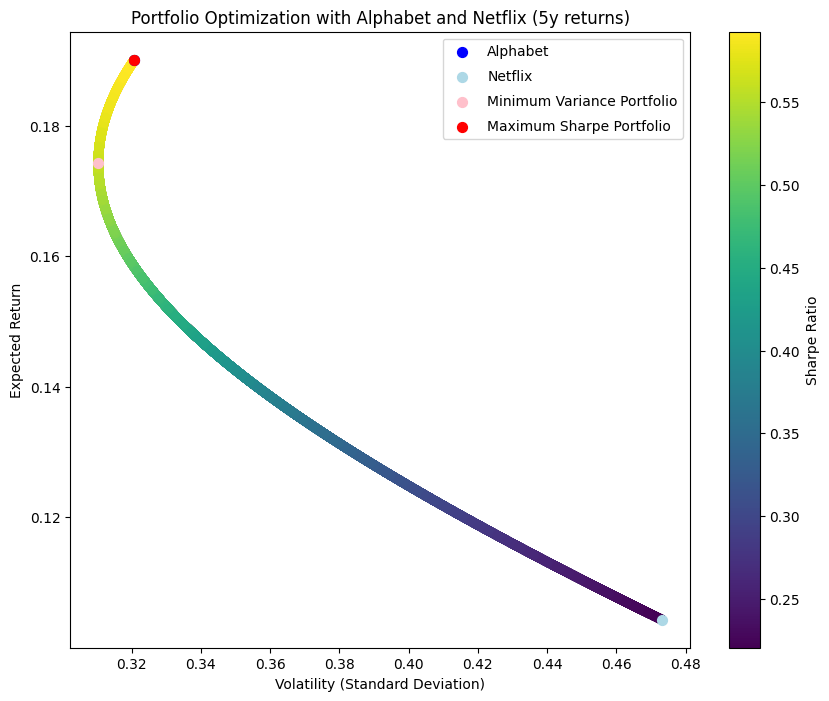

In [8]:
# Plotting
min_var_idx = np.argmin(vol_arr)
min_var_vol = vol_arr[min_var_idx]
min_var_ret = ret_arr[min_var_idx]

plt.figure(figsize=(10, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(annual_volatility['GOOGL'], annualized_log_returns['GOOGL'], color='blue', s=50, label='Alphabet')
plt.scatter(annual_volatility['NFLX'], annualized_log_returns['NFLX'], color='lightblue', s=50, label='Netflix')
plt.scatter(min_var_vol, min_var_ret, color='pink', s=50, label='Minimum Variance Portfolio')
plt.scatter(max_sharpe_vol, max_sharpe_ret, color='red', s=50, label='Maximum Sharpe Portfolio')
plt.title('Portfolio Optimization with Alphabet and Netflix (5y returns)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend(labelspacing=0.8)

The returns and risks are displayed below

In [9]:
d = {
    'Google': [annualized_log_returns['GOOGL'], annual_volatility['GOOGL']],
    'Netflix': [annualized_log_returns['NFLX'], annual_volatility['NFLX']],
    'Minimum Variance Portfolio': [min_var_ret, min_var_vol],
    'Maximum Sharpe Portfolio': [max_sharpe_ret, max_sharpe_vol]
}

df = pd.DataFrame(d, index=['Return', 'Risk'])
display(df)

,Google,Netflix,Minimum Variance Portfolio,Maximum Sharpe Portfolio
Return,0.190142,0.104307,0.174241,0.190136
Risk,0.320863,0.473189,0.310420,0.320854


## 2- Using stock prices of the last year only

In [10]:
symbol = ['NFLX', 'GOOGL']
stocks_df = yf.download(symbol, 
                      start='2023-04-11', 
                      end='2024-04-11', 
                      progress=False
)
stocks_df.head()

data = stocks_df['Adj Close']
data = data.dropna()
log_returns = np.log(data / data.shift(1))
log_returns.dropna(inplace=True)
annualized_log_returns = log_returns.mean() * 252
annual_volatility = log_returns.std() * np.sqrt(252)

np.random.seed(1)
all_weights = []
ret_arr = []
vol_arr = []
sharpe_arr = []
pvar5 = []
conf = 0.05

for x in range(20000):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    all_weights.append(weights)
    ret_arr.append(np.sum(log_returns.mean() * weights) * 252)
    vol_arr.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))))
    sharpe_arr.append(ret_arr[x]/vol_arr[x])

ret_arr = np.array(ret_arr)
vol_arr = np.array(vol_arr)
sharpe_arr = np.array(sharpe_arr)
min_vol_idx = vol_arr.argmin()
min_vol_weights = all_weights[min_vol_idx]
print(f"The weights for the portfolio that min the variance are: {min_vol_weights}.")

max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_vol = vol_arr[max_sharpe_idx]
max_sharpe_ret = ret_arr[max_sharpe_idx]
max_sharpe_weights = all_weights[max_sharpe_idx]
print(f"The weights for the portfolio that maximizes the Sharpe ratio are: {max_sharpe_weights}.")

The weights for the portfolio that min the variance are: [0.66895717 0.33104283].
The weights for the portfolio that maximizes the Sharpe ratio are: [0.47433253 0.52566747].


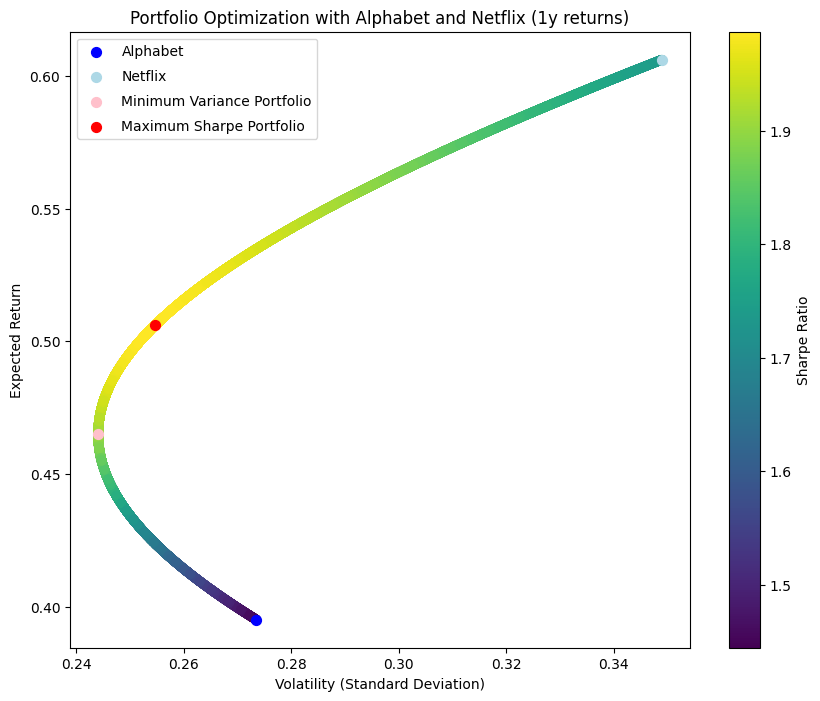

In [11]:
min_var_idx = np.argmin(vol_arr)
min_var_vol = vol_arr[min_var_idx]
min_var_ret = ret_arr[min_var_idx]

plt.figure(figsize=(10, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(annual_volatility['GOOGL'], annualized_log_returns['GOOGL'], color='blue', s=50, label='Alphabet')
plt.scatter(annual_volatility['NFLX'], annualized_log_returns['NFLX'], color='lightblue', s=50, label='Netflix')
plt.scatter(min_var_vol, min_var_ret, color='pink', s=50, label='Minimum Variance Portfolio')
plt.scatter(max_sharpe_vol, max_sharpe_ret, color='red', s=50, label='Maximum Sharpe Portfolio')
plt.title('Portfolio Optimization with Alphabet and Netflix (1y returns)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend(labelspacing=0.8)

In [12]:
d = {
    'Alphabet': [annualized_log_returns['GOOGL'], annual_volatility['GOOGL']],
    'Netflix': [annualized_log_returns['NFLX'], annual_volatility['NFLX']],
    'Minimum Variance Portfolio': [min_var_ret, min_var_vol],
    'Maximum Sharpe Portfolio': [max_sharpe_ret, max_sharpe_vol]
}

df = pd.DataFrame(d, index=['Return', 'Risk'])
df.to_excel('riskreturn.xlsx')

display(df)

,Alphabet,Netflix,Minimum Variance Portfolio,Maximum Sharpe Portfolio
Return,0.395033,0.606165,0.464926,0.506018
Risk,0.273513,0.348965,0.244077,0.254632


--------------

# Beta Analysis

In this section we calculate the beta of the two companies using a regression analysis both with daily and monthly prices.

In [13]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

## 1- Using Daily prices

### Alphabet's beta:

[                       0%%                      ]

[*********************100%%**********************]  2 of 2 completed


The beta of GOOGL relative to S&P 500 is: 1.1524861432183873


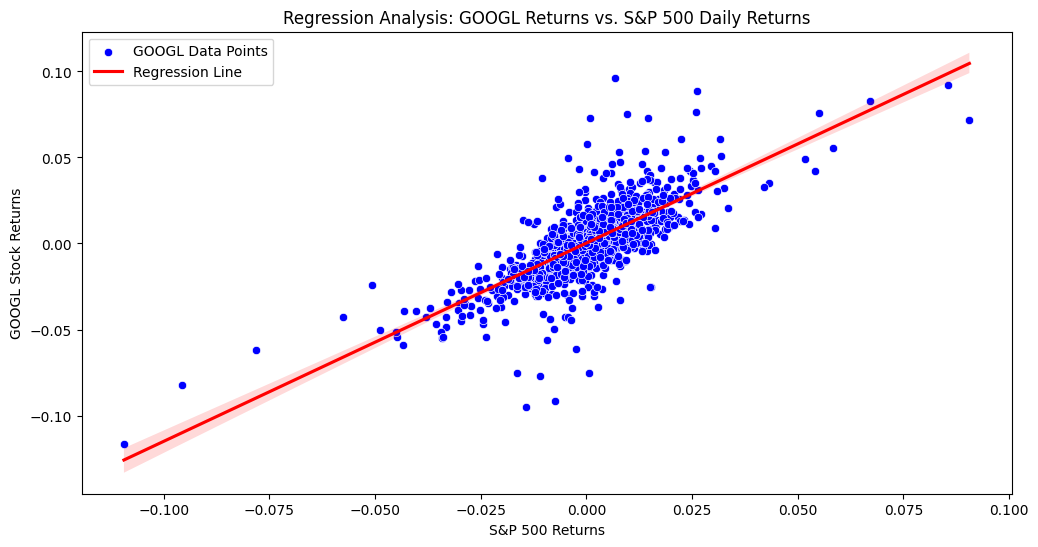

In [14]:
data = yf.download("GOOGL SPY", start="2019-04-11", end="2024-04-11")
returns = data['Adj Close'].pct_change().dropna()
X = returns['SPY'].values.reshape(-1, 1)  
y_googl = returns['GOOGL'].values.reshape(-1, 1)
model_googl = LinearRegression()
model_googl.fit(X, y_googl)
beta_googl = model_googl.coef_[0][0]
print(f"The beta of GOOGL relative to S&P 500 is: {beta_googl}")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=returns['SPY'], y=returns['GOOGL'], color='blue', label='GOOGL Data Points')
sns.regplot(x=returns['SPY'], y=returns['GOOGL'], scatter=False, color='red', label='Regression Line')
plt.title('Regression Analysis: GOOGL Returns vs. S&P 500 Daily Returns')
plt.xlabel('S&P 500 Returns')
plt.ylabel('GOOGL Stock Returns')
plt.legend()
plt.show()


### Netflix's beta:

[*********************100%%**********************]  2 of 2 completed

The beta of NFLX relative to S&P 500 is: 1.0500719148184579


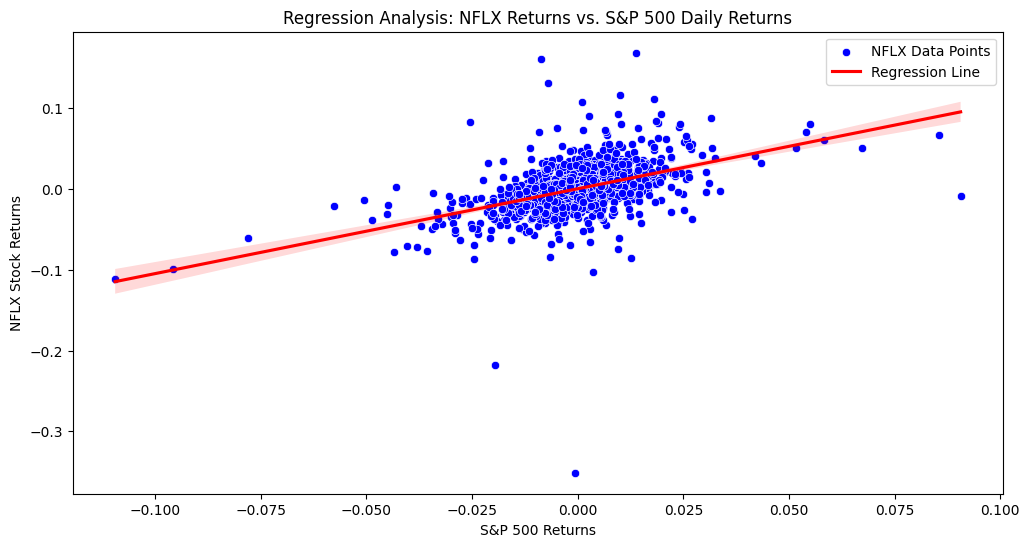

In [15]:
data = yf.download("NFLX SPY", start="2019-04-11", end="2024-04-11")
returns = data['Adj Close'].pct_change().dropna()
X = returns['SPY'].values.reshape(-1, 1)  
y_googl = returns['NFLX'].values.reshape(-1, 1)
model_googl = LinearRegression()
model_googl.fit(X, y_googl)
beta_googl = model_googl.coef_[0][0]
print(f"The beta of NFLX relative to S&P 500 is: {beta_googl}")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=returns['SPY'], y=returns['NFLX'], color='blue', label='NFLX Data Points')
sns.regplot(x=returns['SPY'], y=returns['NFLX'], scatter=False, color='red', label='Regression Line')
plt.title('Regression Analysis: NFLX Returns vs. S&P 500 Daily Returns')
plt.xlabel('S&P 500 Returns')
plt.ylabel('NFLX Stock Returns')
plt.legend()
plt.show()


## 2- Using monthly prices:

### Alphabet's beta

[*********************100%%**********************]  2 of 2 completed

The monthly beta of GOOGL relative to S&P 500 is: 1.0525472242961351


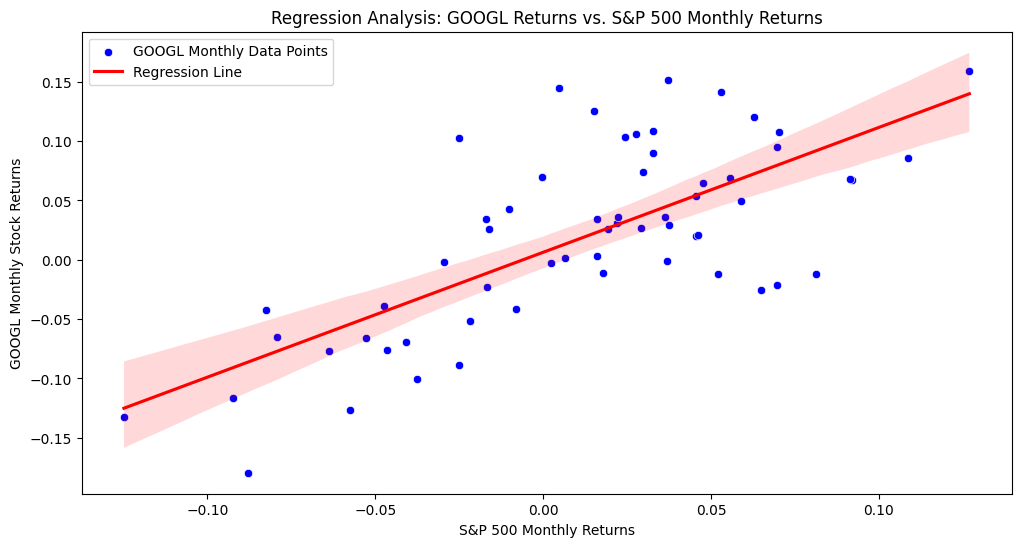

In [16]:
data = yf.download("GOOGL SPY", start="2019-04-11", end="2024-04-11")
monthly_data = data['Adj Close'].resample('M').last()
monthly_returns = monthly_data.pct_change().dropna()
X = monthly_returns['SPY'].values.reshape(-1, 1)  # S&P 500 monthly returns
y_googl = monthly_returns['GOOGL'].values.reshape(-1, 1)  # Alphabet monthly returns
model_googl = LinearRegression()
model_googl.fit(X, y_googl)
beta_googl = model_googl.coef_[0][0]
print(f"The monthly beta of GOOGL relative to S&P 500 is: {beta_googl}")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=monthly_returns['SPY'], y=monthly_returns['GOOGL'], color='blue', label='GOOGL Monthly Data Points')
sns.regplot(x=monthly_returns['SPY'], y=monthly_returns['GOOGL'], scatter=False, color='red', label='Regression Line')
plt.title('Regression Analysis: GOOGL Returns vs. S&P 500 Monthly Returns')
plt.xlabel('S&P 500 Monthly Returns')
plt.ylabel('GOOGL Monthly Stock Returns')
plt.legend()
plt.show()

### Netflix's beta

[*********************100%%**********************]  2 of 2 completed

The monthly beta of NFLX relative to S&P 500 is: 1.2136720471530398


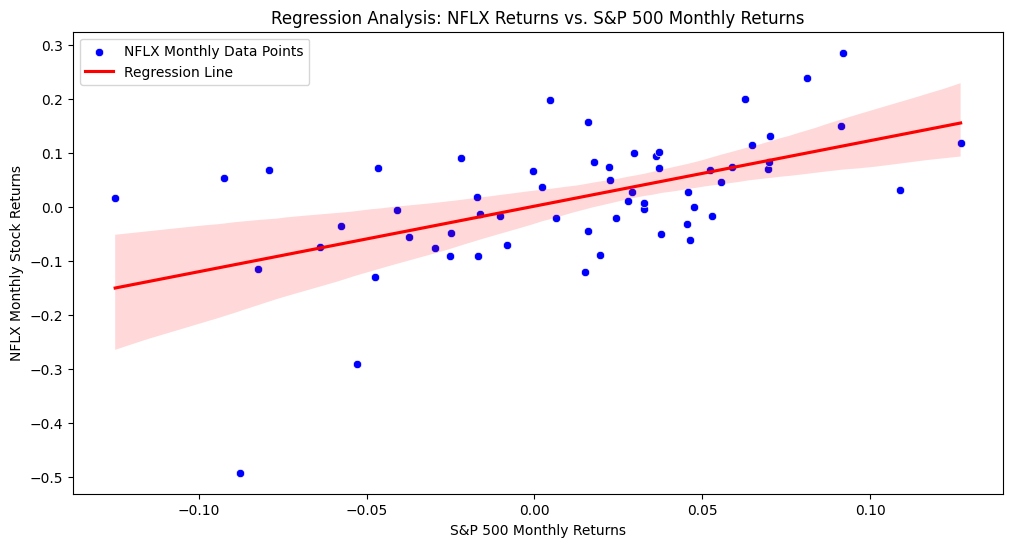

In [17]:
data = yf.download("NFLX SPY", start="2019-04-11", end="2024-04-11")
monthly_data = data['Adj Close'].resample('M').last()
monthly_returns = monthly_data.pct_change().dropna()
X = monthly_returns['SPY'].values.reshape(-1, 1)  # S&P 500 monthly returns
y_googl = monthly_returns['NFLX'].values.reshape(-1, 1)  # Netflix monthly returns
model_googl = LinearRegression()
model_googl.fit(X, y_googl)
beta_googl = model_googl.coef_[0][0]
print(f"The monthly beta of NFLX relative to S&P 500 is: {beta_googl}")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=monthly_returns['SPY'], y=monthly_returns['NFLX'], color='blue', label='NFLX Monthly Data Points')
sns.regplot(x=monthly_returns['SPY'], y=monthly_returns['NFLX'], scatter=False, color='red', label='Regression Line')
plt.title('Regression Analysis: NFLX Returns vs. S&P 500 Monthly Returns')
plt.xlabel('S&P 500 Monthly Returns')
plt.ylabel('NFLX Monthly Stock Returns')
plt.legend()
plt.show()